In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [2]:
def nucleus_energy(N, Z, D, model = 'much'):
    A = N + Z
    if model == 'much':
        alfa = 15.753
        beta = 17.804
        gamma = 0.7103
        epsilon = 23.69
        
    return (alfa*(A) - beta*(A**(2/3)) - gamma*(Z**2)/(A**(1/3)) - epsilon*((N-Z)**2)/A) + D

In [ ]:
    if  A%2 == 0 and Z%2 == 0:
        delta = 34
    elif A%2 == 1 and Z%2 == 1:
        delta == -34
    elif A%2 != Z%2:
        delta = 0

In [30]:
N = np.arange(1, 180)
Z = np.arange(1, 180)

In [31]:
Zv, Nv = np.meshgrid(Z, N)

In [32]:
D = Zv%2 + Nv%2

In [33]:
D = np.where(D == 2, -34, D)
D = np.where(D == 0, 34, D)
D = np.where(D == 1, 0, D)

In [28]:
D

array([[-34,   0, -34, ..., -34,   0, -34],
       [  0,  34,   0, ...,   0,  34,   0],
       [-34,   0, -34, ..., -34,   0, -34],
       ...,
       [-34,   0, -34, ..., -34,   0, -34],
       [  0,  34,   0, ...,   0,  34,   0],
       [-34,   0, -34, ..., -34,   0, -34]])

In [35]:
scaled = nucleus_energy(Nv, Zv, D)
scaled = scaled - scaled.mean()
scaled = scaled/(scaled.max())

In [14]:
N.shape, Z.shape

((179,), (119,))

(1.0, 120)

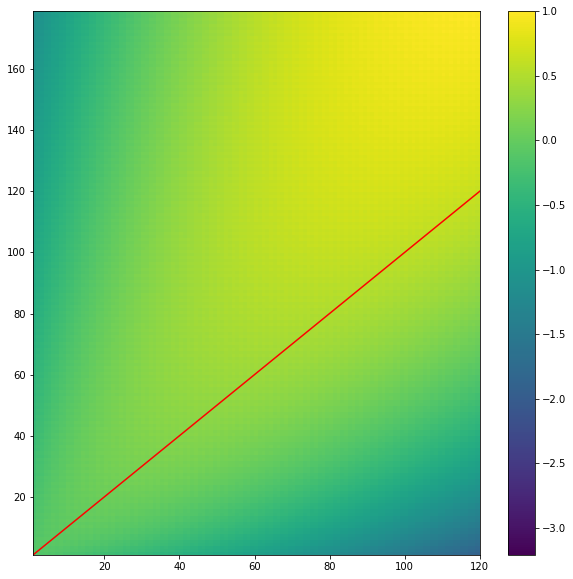

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.pcolormesh(Z, N, scaled)
fig.colorbar(c)
ax.plot(Z, Z, color='r')
ax.set_xlim(right=120)


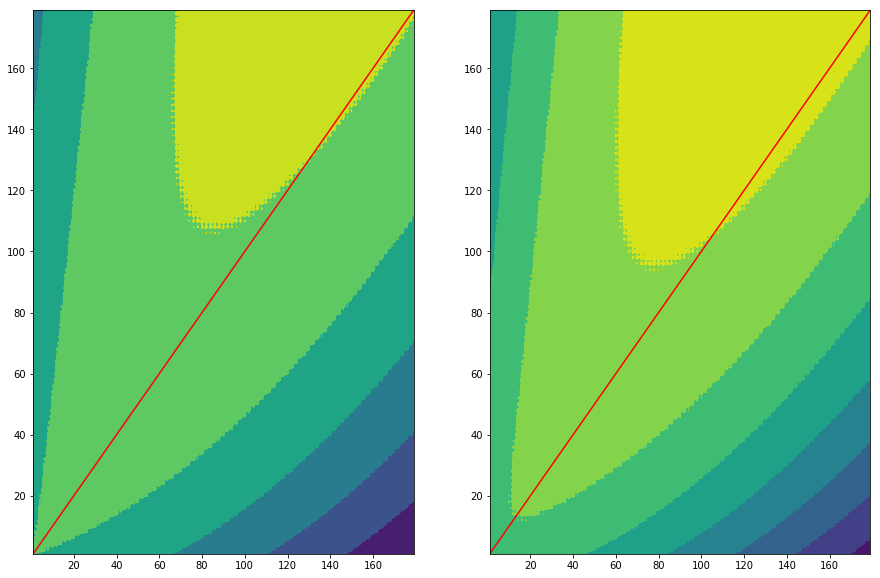

In [54]:
fig, ax = plt.subplots(1,2, figsize=(15, 10))
c = ax[0].contourf(Z, N, nucleus_energy(Nv, Zv, D))
#fig.colorbar(c)
v = ax[1].contourf(Z, N, scaled)
#fig.colorbar(v)
ax[0].plot(Z, Z, color='r')
ax[1].plot(Z, Z, color='r')
#ax.set_xlim(right=120)